In [111]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import datetime as dt
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
import datetime as dt
from pandas.plotting import table
from sqlalchemy import func 



In [112]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine,reflect=True)

In [113]:
Base.classes.keys()

['measurement', 'measurement1', 'measurement_2', 'station', 'station1']

In [114]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [115]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from today

last_year = dt.date.today() - dt.timedelta(days=365)

results = session.query(
    Measurement.date, 
    Measurement.prcp).filter(Measurement.date >= last_year).all()


In [116]:
# reset the index to the date
rain_df = pd.DataFrame(results, columns=['Date', 'precipitation'])
rain_df.set_index(rain_df['Date'], inplace=True)

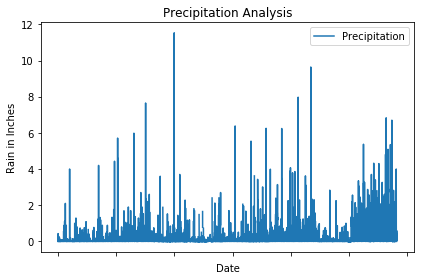

In [117]:
rain_df.plot(x_compat=True)
plt.xlabel('Date')
plt.ylabel('Rain in Inches')
plt.title('Precipitation Analysis')
plt.legend(['Precipitation'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [118]:
#summary of data
rain_df.describe()

,precipitation
count,10799.000000
mean,0.159282
std,0.463682
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,11.530000


In [119]:
#total station
session.query(func.count(Station.station)).all()

[(9)]

In [120]:
#most active
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [121]:
#most tobs
session.query(func.min(Measurement.tobs), 
              func.max(Measurement.tobs), 
              func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

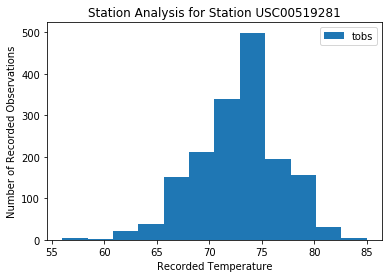

In [122]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
import datetime as dt
prev_year = dt.date.today() - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()

temp_df = pd.DataFrame(results, columns=['tobs'])
temp_df.plot.hist(bins=12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis for Station USC00519281")
plt.show()
plt.tight_layout()
plt.show()

[(None, None, None)]


In [170]:
def calc_temps(start_date, end_date):
    # TMIN, TAVG, and TMAX for a list of dates.
    #Args: start_date (string): A date string in the format %Y-%m-%d
    #    end_date (string): A date string in the format %Y-%m-%d
    #Returns: TMIN, TAVE, and TMAX"""
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))
#     filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
# i can't get the filter to work and then the aciton below doesn't work and then the chart doesn't work
    

In [171]:
prev_year_start = dt.date(2018, 1, 2) - dt.timedelta(days=365)
prev_year_end = dt.date(2018, 1, 29) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

53.0 73.09795396419437 87.0


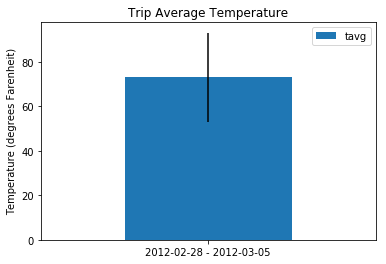

In [172]:
tavg_df.plot(kind='bar',yerr=[[tavg-tmin],[tmax-tavg]])
plt.xticks(rotation='horizontal')
plt.ylabel('Temperature (degrees Farenheit)')
plt.title('Trip Average Temperature')
plt.show()

[]
